In [1]:
# load data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
data_dir =  "/home/muellert/Dokumente/locarna_parameteropt/Data/20181221_globla_optimized_param_with_global_locarna/"
plot_dir_paper = '/home/muellert/Dokumente/locarna_parameteropt/plots/20181031_plots_for_paper/'

In [3]:
df_local_pen15_sw200_optPrarm = pd.read_csv(data_dir + '/df_local_pen15_sw200_optPrarm', sep='\t')
df_local_sw200_pen0_defParam = pd.read_csv(data_dir + '/df_local_sw200_pen0_defParam', sep='\t')

df_global_pen0_sw200_optPrarm = pd.read_csv(data_dir + '/20190108_global_locarna_run_k2_Bralibase_pen0_SW200_optm_param', sep='\t')
df_global_sw200_pen15_optParam = pd.read_csv(data_dir + '/20190108_global_locarna_run_k2_Bralibase_pen15_SW200_optm_param', sep='\t')

df_global_sw200_pen0_defParam = pd.read_csv(data_dir + '/20181220_global_locarna_run_k2_Bralibase_pen_0_SW200_def_param_cut.log', sep='\t')


In [4]:
df_global_sw200_pen0_defParam['spsmax'] = df_global_sw200_pen0_defParam['SPS']
df_global_sw200_pen0_defParam.info()


df_global_pen0_sw200_optPrarm['spsmax'] = df_global_pen0_sw200_optPrarm['SPS']
df_global_pen0_sw200_optPrarm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 16 columns):
Tool               8976 non-null object
APSI               8976 non-null int64
SPI                8976 non-null int64
SPS                8976 non-null float64
locarnascore       8976 non-null int64
sum_seq_length     8976 non-null int64
structureWeight    8976 non-null int64
min-prob           8976 non-null float64
BPP(pair)          8976 non-null int64
BPP(prog)          8976 non-null int64
usrTime            8976 non-null float64
SysTime            8976 non-null float64
RealTime           8976 non-null float64
name               8976 non-null object
mlocarnaCall       8976 non-null object
spsmax             8976 non-null float64
dtypes: float64(6), int64(7), object(3)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 16 columns):
Tool               8976 non-null object
APSI               8976 non-null int64
SPI   

In [5]:
#df_local_pen15_sw200_optPrarm.info()


In [6]:
df_local_opt = pd.concat([df_local_pen15_sw200_optPrarm['Filename'], df_local_pen15_sw200_optPrarm['sps'], df_local_pen15_sw200_optPrarm['spsmax'], df_local_pen15_sw200_optPrarm['call']], axis=1, keys=['Filename', 'SPS', 'maxSPS', 'call'])
df_global = pd.concat([df_global_pen0_sw200_optPrarm['name'], df_global_pen0_sw200_optPrarm['SPS'], df_global_pen0_sw200_optPrarm['spsmax'], df_global_pen0_sw200_optPrarm['mlocarnaCall']], axis=1, keys=['Filename', 'SPS', 'maxSPS', 'call'])
df_local_def = pd.concat([df_local_sw200_pen0_defParam['Filename'], df_local_sw200_pen0_defParam['sps'], df_local_sw200_pen0_defParam['spsmax'], df_local_sw200_pen0_defParam['call']], axis=1, keys=['Filename', 'SPS', 'maxSPS', 'call'])


In [7]:
df_local_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6226 entries, 0 to 6225
Data columns (total 4 columns):
Filename    6226 non-null object
SPS         6226 non-null float64
maxSPS      6226 non-null float64
call        6226 non-null object
dtypes: float64(2), object(2)
memory usage: 194.6+ KB


In [8]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 4 columns):
Filename    8976 non-null object
SPS         8976 non-null float64
maxSPS      8976 non-null float64
call        8976 non-null object
dtypes: float64(2), object(2)
memory usage: 280.6+ KB


In [9]:
df_local_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6226 entries, 0 to 6225
Data columns (total 4 columns):
Filename    6226 non-null object
SPS         6226 non-null float64
maxSPS      6226 non-null float64
call        6226 non-null object
dtypes: float64(2), object(2)
memory usage: 194.6+ KB


In [10]:
def generate_one_df(df_1, df_2, df_3, id_1='shuffled_RNA', id_2='unshuffled_RNA', id_3='unshuffled_RNA'):
    
    df_1['seq'] = id_1
    df_2['seq'] = id_2
    df_3['seq'] = id_3

    
    frames = [df_1, df_2, df_3]
    df_concat = pd.concat(frames)
    
    return df_concat

In [11]:
# Generate mearged df's

# df for global parameter optimization improvement
df_global_optimized = generate_one_df(df_global_sw200_pen0_defParam, df_global_pen0_sw200_optPrarm, df_global_sw200_pen15_optParam, id_1='Global default', id_2='Global optimized', id_3='Global optimized pen 15')

# df for comparing local optimized to global optimized
#df_local_global_comp = generate_one_df(df_local_def, df_local_opt, df_global, id_1='Local default', id_2='Local optimized pen15', id_3='global optimized')


/home/muellert/miniconda3/envs/ploting/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if __name__ == '__main__':


In [12]:
# df for comparing local optimized to global optimized
df_local_global_comp = generate_one_df(df_local_def, df_local_opt, df_global, id_1='Local def', id_2='Local opt pen15', id_3='Global opt')


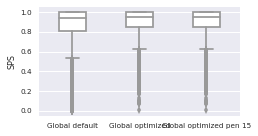

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font='sans-serif', font_scale=0.73)
col_dims = (3.6, 2.0) # one
fig, ax = plt.subplots(figsize=col_dims)
#sns.set_context("paper")

#figsize=(8,4)width=0.5

sns.boxplot(x="seq", y="SPS", data=df_global_optimized,  ax=ax, width=0.4, color='white')
#ax1.set_title(plot_title, fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('SPS')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



fig.savefig(plot_dir_paper + 'boxplot_compare_global_defParam_SW200_and_optParam.pdf', format='pdf', bbox_inches='tight')

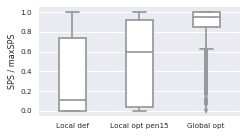

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font='sans-serif', font_scale=0.73)
col_dims = (3.6, 2.0) # one
fig, ax = plt.subplots(figsize=col_dims)
#sns.set_context("paper")

#figsize=(8,4)width=0.5

sns.boxplot(x="seq", y="maxSPS", data=df_local_global_comp,  ax=ax, width=0.4, color='white')
#ax1.set_title(plot_title, fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('SPS / maxSPS')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



fig.savefig(plot_dir_paper + 'boxplot_compare_defParam_SW200_and_optParam_SW200_pen15_global_optimized_maxSPS.pdf', format='pdf', bbox_inches='tight')

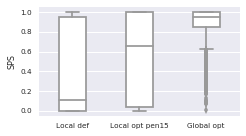

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font='sans-serif', font_scale=0.73)
col_dims = (3.6, 2.0) # one
fig, ax = plt.subplots(figsize=col_dims)
#sns.set_context("paper")

#figsize=(8,4)width=0.5

sns.boxplot(x="seq", y="SPS", data=df_local_global_comp,  ax=ax, width=0.4, color='white')
#ax1.set_title(plot_title, fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('SPS')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



fig.savefig(plot_dir_paper + 'boxplot_compare_defParam_SW200_and_optParam_SW200_pen15_global_optimized_SPS.pdf', format='pdf', bbox_inches='tight')

In [16]:
df_global_pen0_sw200_optPrarm["SPS"].median()
#df_global_pen0_sw200_optPrarm["SPS"].mean()

0.94999999999999996

In [17]:
df_global_sw200_pen0_defParam["SPS"].median()
#df_global_sw200_pen0_defParam["SPS"].mean()


0.93999999999999995